In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import glob
from pathlib import Path

In [3]:
log_dir_root = Path('../../data/')
log_dirs = [log_dir_root / d for d in os.listdir(log_dir_root)]
exp_names = ['_'.join(d.stem.split('_')[2:-3]) for d in log_dirs]
log_files = [d/f for d in log_dirs for f in [f for f in os.listdir(d) if f.startswith('events.out.tfevents')]]

In [4]:
exp_scalars = []
for log_file in log_files:
    ea = EventAccumulator(str(log_file))
    ea.Reload()

    scalars = {}
    for tag in ea.Tags()['scalars']:
        scalar_events = ea.Scalars(tag)
        steps = [s.step for s in scalar_events]
        values = [s.value for s in scalar_events]
        scalars[tag] = {'steps': steps, 'values': values}
        
    exp_scalars.append(scalars)

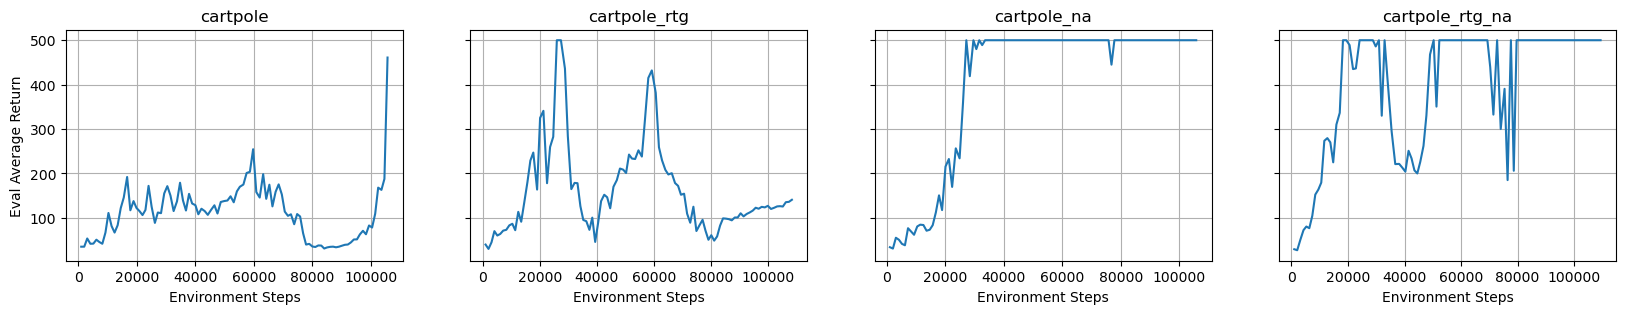

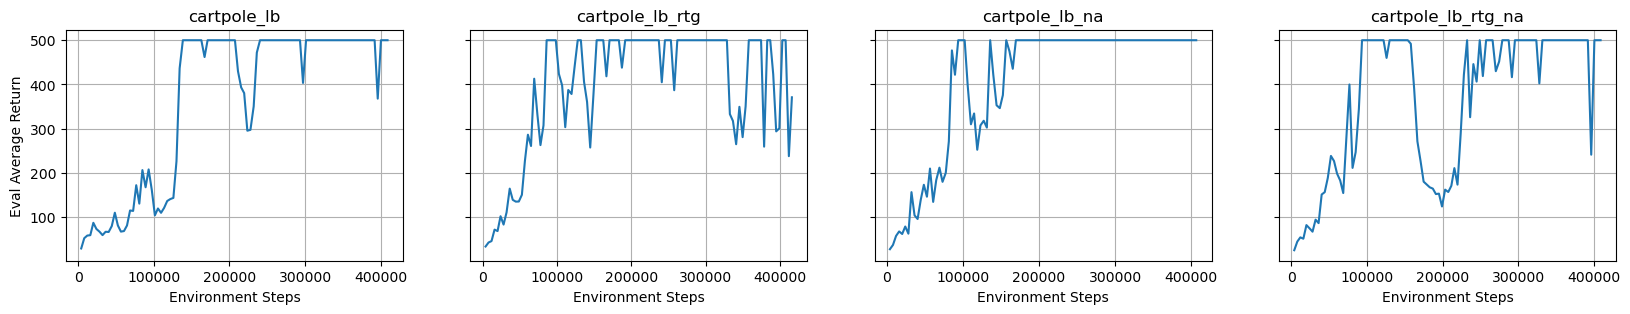

In [5]:
# batch size 1000
_, axs = plt.subplots(1, 4, figsize=(20,3), sharey=True)
for i, ax in zip([0, 6, 5, 7], axs):
    exp_name = exp_names[i]
    scalars = exp_scalars[i]
    eval_avg_returns = scalars['Eval_AverageReturn']['values']
    env_steps = scalars['Train_EnvstepsSoFar']['values']
    ax.plot(env_steps, eval_avg_returns)
    ax.set_title(exp_name)

axs[0].set_ylabel('Eval Average Return')
for ax in axs:
    ax.grid()
    ax.set_xlabel('Environment Steps')
plt.show()

# batch size 4000
_, axs = plt.subplots(1, 4, figsize=(20,3), sharey=True)
for i, ax in zip([1, 3, 2, 4], axs):
    exp_name = exp_names[i]
    scalars = exp_scalars[i]
    eval_avg_returns = scalars['Eval_AverageReturn']['values']
    env_steps = scalars['Train_EnvstepsSoFar']['values']
    ax.plot(env_steps, eval_avg_returns)
    ax.set_title(exp_name)

axs[0].set_ylabel('Eval Average Return')
for ax in axs:
    ax.grid()
    ax.set_xlabel('Environment Steps')
plt.show()
